# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Yorris Siagian]
- **Email:** [yorristomson5@gmail.com]
- **ID Dicoding:** [yorris_siagian]

## Menentukan Pertanyaan Bisnis

- Bagaimana pola penggunaan sepeda berdasarkan waktu (jam, hari, bulan, musim)?
- Bagaimana cuaca memengaruhi penyewaan sepeda?
- Kapan waktu yang tepat menambah sepeda?

## Import Semua Packages/Library yang Digunakan

In [454]:
#liblary yang dibutuhkan
import numpy as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import zipfile
import os

## Data Wrangling

### Gathering Data

#upload data ke colab dan ekstrak file zip

In [455]:
#upload data ke colab dan ekstrak file zip
uploaded = files.upload()
for filename in uploaded.keys():
    if filename.endswith('.zip'):
        with zipfile.ZipFile(filename, 'r') as zip_ref:
            zip_ref.extractall('/content/')
        print(f"File {filename} berhasil diekstrak!")

Saving Bike-sharing-dataset.zip to Bike-sharing-dataset (7).zip
File Bike-sharing-dataset (7).zip berhasil diekstrak!


In [456]:
#memuat data day_df
day_df=pd.read_csv('/content/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [457]:
#memuat data hour_df
hour_df=pd.read_csv('/content/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Pada tabel day_df menyajikan data peminjam sepeda berdasarkan hari
- Pada tabel hour_df menyajikan data peminjam sepeda berdasarkan jam

### Assessing Data

In [458]:
#menilai data day_df
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [459]:
#memastikan missing value pada kolom gender
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [460]:
#memeriksa duplikasi data pada kolom day
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [461]:
#memeriksa parameter statistik dari kolom numerik yang terdapat dalam day_df
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [462]:
#menilai data hour_df
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [463]:
#memastikan missing value pada kolom gender
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [464]:
#memeriksa duplikasi data pada kolom hour
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [465]:
#memeriksa parameter statistik dari kolom numerik yang terdapat dalam hour_df
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- pada tabel day_df dan hour_df di colom dteday masih bertipe object pada tahap cleaning akan diubah ke datetime misalnya(musim panas, musim dingin, dll)
- pada kedua tabel "season, weekday, mnth" masih berbentuk int pada tahap selanjutnya akan diubah ke label nama untuk mempermudah dipahami dan dibaca
-pada kedua tabel tidak ada duplikasi dan missing value
-pada tabel hour_df windspeed dan hum ada nilai 0 dan temp kemungkinan outlier

### Cleaning Data

In [466]:
#Menghapus duplakate data pada kedua tabel yaitu day_df dan hour_df
day_df.drop_duplicates(inplace=True)
hour_df.drop_duplicates(inplace=True)

In [467]:
#mengganti tipe data dteday dari object ke datetime pada kedua tabel yaitu day_df dan hour_df
datetime_columns = ["dteday"]
#pada day_df
for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])
#pada hour_df
for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

In [468]:
#melakukan cek ulang pada colom dteday setelah dilakukan perubahan pada kedua tabel
day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [469]:
# Buat ulang mapping label musim sesuai dokumentasi
season_mapping = {
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
}

# Terapkan pemetaan pada dataset
day_df['season'] = day_df['season'].map(season_mapping)
hour_df['season'] = hour_df['season'].map(season_mapping)

# Cek apakah perubahan sudah benar
print(day_df['season'].unique())
print(hour_df['season'].unique())


['Spring' 'Summer' 'Fall' 'Winter']
['Spring' 'Summer' 'Fall' 'Winter']


In [470]:
#melakukan cek ulang setelah dilakukan perubahan pada tabel day_df
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [471]:
#melakukan cek ulang setelah dilakukan perubahan pada tabel day_df
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [472]:
#mengecek nilai pada kolom temp, hum, dan windseed
print(hour_df[['temp', 'hum', 'windspeed']].describe())

               temp           hum     windspeed
count  17379.000000  17379.000000  17379.000000
mean       0.496987      0.627229      0.190098
std        0.192556      0.192930      0.122340
min        0.020000      0.000000      0.000000
25%        0.340000      0.480000      0.104500
50%        0.500000      0.630000      0.194000
75%        0.660000      0.780000      0.253700
max        1.000000      1.000000      0.850700


In [473]:
# mengatasi nilai 0 pada hum
# hum tidak bisa bernilai 0, mengganti 0 dengan nilai median agar lebih masuk akal.
hour_df.loc[hour_df['hum'] == 0, 'hum'] = hour_df['hum'].median()

In [474]:
# Mengatasi nilai 0 pada windspeed
# Mengganti nilai 0 dengan median karena windspeed seharusnya tidak nol.
hour_df.loc[hour_df['windspeed'] == 0, 'windspeed'] = hour_df['windspeed'].median()

In [475]:
#cek ulang kolom hum dan windspeed setelah dilakukan perbaikan
print(hour_df[['temp', 'hum', 'windspeed']].describe())

               temp           hum     windspeed
count  17379.000000  17379.000000  17379.000000
mean       0.496987      0.628026      0.214433
std        0.192556      0.191633      0.099215
min        0.020000      0.080000      0.089600
25%        0.340000      0.480000      0.134300
50%        0.500000      0.630000      0.194000
75%        0.660000      0.780000      0.253700
max        1.000000      1.000000      0.850700


In [476]:
#memeriksa kembali data setelah proses cleaning data
day_df.info()
hour_df.describe()
hour_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    object        
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


**Insight:**
- dteday tipe datanya sudah diubah dari object ke datetime
- kolom season,mnth, dan weekday dengan membuat mapping dari sebelumnya berbentuk angka menjadi label
-data tidak memiliki duplikat dan missing value
-nilai pada hum dan windspeed telah diganti yang awal nya 0 diganti ke median
-setelah dilakukan pengecekan pada temp ternyata tidak ada masalah, jadi tidak perlu diperbaiki
-melakukan pengecekan ulang untuk memastikan semua perubahan berhasil dilakukan

## Exploratory Data Analysis (EDA)

In [477]:
#explorasi data day_df
day_df.describe()


,instant,dteday,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [478]:
#penyewaan sepeda perbulan
day_df.groupby("mnth")["cnt"].mean()

,cnt
mnth,
1,2176.338710
2,2655.298246
3,3692.258065
4,4484.900000
5,5349.774194
6,5772.366667
7,5563.677419
8,5664.419355
9,5766.516667


In [479]:
#perbandingan penyewaan sepeda pada hari kerja dan libur
day_df.groupby("workingday")["cnt"].mean()

,cnt
workingday,
0,4330.168831
1,4584.820000


In [480]:
#penyewaan sepeda berdasarkan cuaca
day_df.groupby("weathersit")["cnt"].mean()

,cnt
weathersit,
1,4876.786177
2,4035.862348
3,1803.285714


In [481]:
#penyewaan berdasarkan musim
day_df.groupby("season")["cnt"].mean()

,cnt
season,
Fall,5644.303191
Spring,2604.132597
Summer,4992.331522
Winter,4728.162921


In [482]:
#penyewaan berdasarkan tahun
day_df.groupby("yr")["cnt"].mean()

,cnt
yr,
0,3405.761644
1,5599.934426


In [483]:
#penyewaan berdasarkan hari dalam seminggu
day_df.groupby("weekday")["cnt"].mean()

,cnt
weekday,
0,4228.828571
1,4338.123810
2,4510.663462
3,4548.538462
4,4667.259615
5,4690.288462
6,4550.542857


In [484]:
#hubungan cuaca terhadap penyewaan sepeda
day_df.groupby("weathersit")["cnt"].mean()

,cnt
weathersit,
1,4876.786177
2,4035.862348
3,1803.285714


In [485]:
#hubungan suhu terhadap penyewaan sepeda
day_df[["temp", "cnt"]].corr()

,temp,cnt
temp,1.000000,0.627494
cnt,0.627494,1.000000


In [486]:
#hubungan kelembapan terhadap penyewaan sepeda
day_df[["hum", "cnt"]].corr()

,hum,cnt
hum,1.000000,-0.100659
cnt,-0.100659,1.000000


In [487]:
#hubungan kecepatan angin terhadap penyewaan sepeda
day_df[["windspeed", "cnt"]].corr()

,windspeed,cnt
windspeed,1.000000,-0.234545
cnt,-0.234545,1.000000


In [488]:
#explorasi data hour_df
hour_df.describe()

,instant,dteday,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.628026,0.214433,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.080000,0.089600,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.134300,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.191633,0.099215,49.305030,151.357286,181.387599


In [489]:
#penyewaan sepeda perbulan
hour_df.groupby("mnth")["cnt"].mean()

,cnt
mnth,
1,94.424773
2,112.865026
3,155.410726
4,187.260960
5,222.907258
6,240.515278
7,231.819892
8,238.097627
9,240.773138


In [490]:
#penyewaan sepeda berdasarkan cuaca
hour_df.groupby("weathersit")["cnt"].mean()

,cnt
weathersit,
1,204.869272
2,175.165493
3,111.579281
4,74.333333


In [491]:
#perbandingan penyewaan sepeda pada hari kerja dan libur
hour_df.groupby("workingday")["cnt"].mean()

,cnt
workingday,
0,181.405332
1,193.207754


In [492]:
#penyewaan berdasarkan musim
hour_df.groupby("season")["cnt"].mean()

,cnt
season,
Fall,236.016237
Spring,111.114569
Summer,208.344069
Winter,198.868856


In [493]:
#penyewaan berdasarkan tahun
hour_df.groupby("yr")["cnt"].mean()

,cnt
yr,
0,143.794448
1,234.666361


In [494]:
#penyewaan berdasarkan hari dalam seminggu
hour_df.groupby("weekday")["cnt"].mean()

,cnt
weekday,
0,177.468825
1,183.744655
2,191.238891
3,191.130505
4,196.436665
5,196.135907
6,190.209793


In [495]:
#hubungan cuaca terhadap penyewaan sepeda
hour_df.groupby("weathersit")["cnt"].mean()

,cnt
weathersit,
1,204.869272
2,175.165493
3,111.579281
4,74.333333


In [496]:
#hubungan suhu terhadap penyewaan sepeda
hour_df[["temp", "cnt"]].corr()

,temp,cnt
temp,1.000000,0.404772
cnt,0.404772,1.000000


In [497]:
#hubungan kelembapan terhadap penyewaan sepeda
hour_df[["hum", "cnt"]].corr()

,hum,cnt
hum,1.000000,-0.328793
cnt,-0.328793,1.000000


In [498]:
#hubungan kecepatan angin terhadap penyewaan sepeda
hour_df[["windspeed", "cnt"]].corr()

,windspeed,cnt
windspeed,1.000000,0.075992
cnt,0.075992,1.000000


### Explore ...

In [499]:
#penyewaan per bulan dan tahun
pivot_mnth_yr = day_df.pivot_table(values='cnt', index='mnth', columns='yr', aggfunc='mean')
print("\nPenyewaan Rata-rata per Bulan dan Tahun:")
print(pivot_mnth_yr)


Penyewaan Rata-rata per Bulan dan Tahun:
yr              0            1
mnth                          
1     1231.903226  3120.774194
2     1721.964286  3556.448276
3     2065.967742  5318.548387
4     3162.333333  5807.466667
5     4381.322581  6318.225806
6     4783.733333  6761.000000
7     4559.387097  6567.967742
8     4409.387097  6919.451613
9     4247.266667  7285.766667
10    3984.225806  6414.225806
11    3405.566667  5088.800000
12    2816.870968  3990.741935


In [500]:
#Penyewaan berdasarkan musim dan cuaca
pivot_season_weather = day_df.pivot_table(values='cnt', index='season', columns='weathersit', aggfunc='mean')
print("\nPenyewaan Rata-rata berdasarkan Musim dan Cuaca:")
print(pivot_season_weather)


Penyewaan Rata-rata berdasarkan Musim dan Cuaca:
weathersit            1            2        3
season                                       
Fall        5878.257353  5222.479167  2751.75
Spring      2811.135135  2357.166667   934.75
Summer      5548.548673  4236.705882  1169.00
Winter      5043.563107  4654.000000  1961.60


In [501]:
#Penyewaan berdasarkan hari kerja/libur & musim
pivot_workingday_season = day_df.pivot_table(values='cnt', index='season', columns='workingday', aggfunc='mean')
print("\nPenyewaan Rata-rata berdasarkan Musim dan Hari Kerja/Libur:")
print(pivot_workingday_season)


Penyewaan Rata-rata berdasarkan Musim dan Hari Kerja/Libur:
workingday            0            1
season                              
Fall        5474.666667  5718.114504
Spring      2257.098361  2780.541667
Summer      5142.428571  4926.664062
Winter      4606.210526  4785.611570


In [502]:
#Penyewaan berdasarkan hari dalam seminggu
pivot_weekday = day_df.pivot_table(values='cnt', index='weekday', aggfunc='mean')
print("\nPenyewaan Rata-rata berdasarkan Hari dalam Seminggu:")
print(pivot_weekday)


Penyewaan Rata-rata berdasarkan Hari dalam Seminggu:
                 cnt
weekday             
0        4228.828571
1        4338.123810
2        4510.663462
3        4548.538462
4        4667.259615
5        4690.288462
6        4550.542857


In [503]:
# Penyewaan rata-rata berdasarkan jam dalam sehari
pivot_hourly = hour_df.pivot_table(values='cnt', index='hr', aggfunc='mean')
print("\nPenyewaan Rata-rata berdasarkan Jam dalam Sehari:")
print(pivot_hourly)


Penyewaan Rata-rata berdasarkan Jam dalam Sehari:
           cnt
hr            
0    53.898072
1    33.375691
2    22.869930
3    11.727403
4     6.352941
5    19.889819
6    76.044138
7   212.064649
8   359.011004
9   219.309491
10  173.668501
11  208.143054
12  253.315934
13  253.661180
14  240.949246
15  251.233196
16  311.983562
17  461.452055
18  425.510989
19  311.523352
20  226.030220
21  172.314560
22  131.335165
23   87.831044


In [504]:
# Penyewaan rata-rata per hari dalam seminggu
pivot_daily = hour_df.pivot_table(values='cnt', index='weekday', aggfunc='mean')
print("\nPenyewaan Rata-rata berdasarkan Hari dalam Seminggu:")
print(pivot_daily)


Penyewaan Rata-rata berdasarkan Hari dalam Seminggu:
                cnt
weekday            
0        177.468825
1        183.744655
2        191.238891
3        191.130505
4        196.436665
5        196.135907
6        190.209793


In [505]:
# Penyewaan rata-rata per bulan
pivot_monthly = hour_df.pivot_table(values='cnt', index='mnth', aggfunc='mean')
print("\nPenyewaan Rata-rata berdasarkan Bulan:")
print(pivot_monthly)


Penyewaan Rata-rata berdasarkan Bulan:
             cnt
mnth            
1      94.424773
2     112.865026
3     155.410726
4     187.260960
5     222.907258
6     240.515278
7     231.819892
8     238.097627
9     240.773138
10    222.158511
11    177.335421
12    142.303439


In [506]:
# Penyewaan rata-rata berdasarkan musim dan jam dalam sehari
pivot_season_hour = hour_df.pivot_table(values='cnt', index='hr', columns='season', aggfunc='mean')
print("\nPenyewaan Rata-rata berdasarkan Jam dan Musim:")
print(pivot_season_hour)


Penyewaan Rata-rata berdasarkan Jam dan Musim:
season        Fall      Spring      Summer      Winter
hr                                                    
0        73.914439   27.404494   56.842391   56.333333
1        43.720430   18.140449   35.222826   35.920455
2        30.731183   12.794118   23.380435   23.765714
3        15.752688    7.102564   11.450549   11.861272
4         8.240642    3.181818    6.211111    7.267045
5        26.454545   10.701754   19.169399   22.590909
6       101.315508   40.792135   79.070652   81.681818
7       276.595745  115.391061  221.483696  231.607955
8       421.297872  235.167598  380.135870  396.346591
9       254.930851  147.016760  233.983696  239.443182
10      214.920213  100.217877  189.777174  187.465909
11      251.696809  120.530726  231.440217  226.369318
12      300.308511  150.727778  278.543478  281.664773
13      296.042553  156.527778  282.728261  277.209040
14      282.234043  147.805556  265.777174  266.011299
15      288.40957

In [517]:
# merge day_df dan hour_df dan melakukan rename pada day_df menghindari error
day_df = day_df.rename(columns={
    'instant': 'instant_day',
    'season': 'season_day',
    'yr': 'yr_day',
    'mnth': 'mnth_day',
    'holiday': 'holiday_day',
    'weekday': 'weekday_day',
    'workingday': 'workingday_day',
    'weathersit': 'weathersit_day',
    'temp': 'temp_day',
    'atemp': 'atemp_day',
    'hum': 'hum_day',
    'windspeed': 'windspeed_day',
    'casual': 'casual_day',
    'registered': 'registered_day',
    'cnt': 'cnt_day'
})

merged_df = pd.merge(hour_df, day_df, on="dteday", how="left")

if 'instant_y' in merged_df.columns:
    merged_df = merged_df.drop(columns=['instant_y'])

season_mapping = {'Spring': 1, 'Summer': 2, 'Fall': 3, 'Winter': 4}
if merged_df['season'].dtype == 'object':
    merged_df['season'] = merged_df['season'].map(season_mapping)

print(merged_df.head())
print(merged_df.columns)

   instant     dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1   0        0        6           0   
1        2 2011-01-01       1   0     1   1        0        6           0   
2        3 2011-01-01       1   0     1   2        0        6           0   
3        4 2011-01-01       1   0     1   3        0        6           0   
4        5 2011-01-01       1   0     1   4        0        6           0   

   weathersit  ...  weekday_day  workingday_day  weathersit_day  temp_day  \
0           1  ...            6               0               2  0.344167   
1           1  ...            6               0               2  0.344167   
2           1  ...            6               0               2  0.344167   
3           1  ...            6               0               2  0.344167   
4           1  ...            6               0               2  0.344167   

   atemp_day   hum_day  windspeed_day  casual_day registered_day  cnt_day 

**Insight:**
- penyewaan sepeda bervariasi setiap jam/hari
- penyewaan lebih tinggi pada hari kerja dibanding akhir pekan
- penyewaan tertinggi terjadi di pagi(jam 8) dan sore (jam 17-18)
- penyewaan lebih rendah di musim spring
- temp memiliki kolerasi positif dengan penyewaan
- humidity dan windspeed memiliki kolerasi negatif, tetapi tidak terlalu signifikan
- holiday tidak berpengaruh besar terhadap penyewaan
-melakukan merge pada day_df dan hour_df dan melakukan rename pada day_df untuk menghindari error

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren penyewaan sepeda dalam beberapa bulan terakhir?

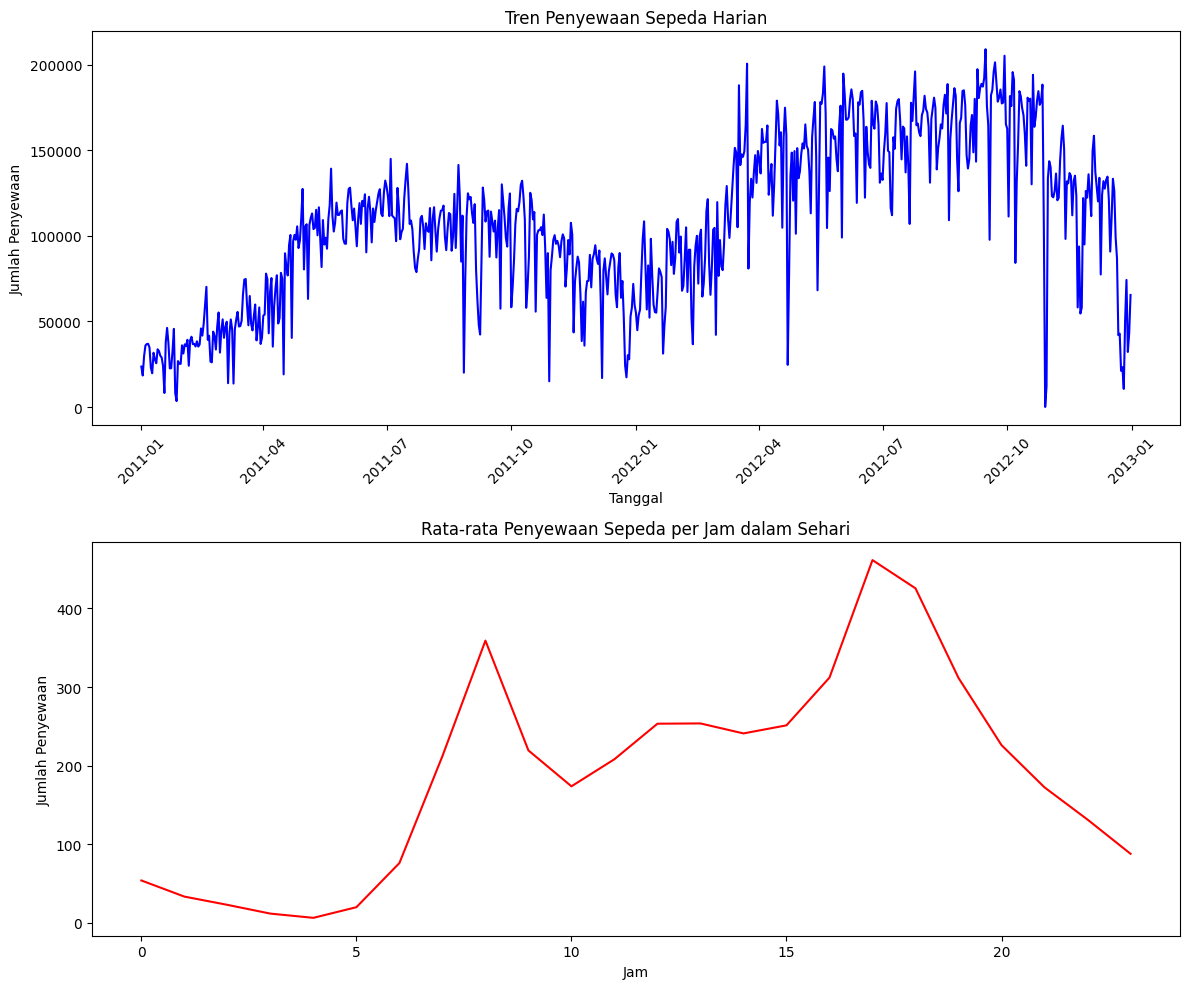

In [508]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

#Tren Penyewaan Sepeda Harian
axes[0].plot(merged_df.groupby('dteday')['cnt_day'].sum(), color='blue')
axes[0].set_title("Tren Penyewaan Sepeda Harian")
axes[0].set_xlabel("Tanggal")
axes[0].set_ylabel("Jumlah Penyewaan")
axes[0].tick_params(axis='x', rotation=45)

#Tren Penyewaan Sepeda Per Jam dalam Sehari
hourly_trend = merged_df.groupby('hr')['cnt'].mean()
axes[1].plot(hourly_trend.index, hourly_trend.values, color='red')
axes[1].set_title("Rata-rata Penyewaan Sepeda per Jam dalam Sehari")
axes[1].set_xlabel("Jam")
axes[1].set_ylabel("Jumlah Penyewaan")

plt.tight_layout()
plt.show()

### Pertanyaan 2:Pada jam berapa penyewaan sepeda paling banyak dan paling sedikit?

<ipython-input-509-b607478e4855>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=day_df, x='weekday_day', y='cnt_day', ax=axes[0], palette='Blues', ci=None)
<ipython-input-509-b607478e4855>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=day_df, x='weekday_day', y='cnt_day', ax=axes[0], palette='Blues', ci=None)
<ipython-input-509-b607478e4855>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(["Minggu", "Senin", "Selasa", "Rabu", "Kamis", "Jumat", "Sabtu"])
<ipython-input-509-b607478e4855>:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=hourly_trend.index, y=hourly_trend.values, ax=axes[1], pa

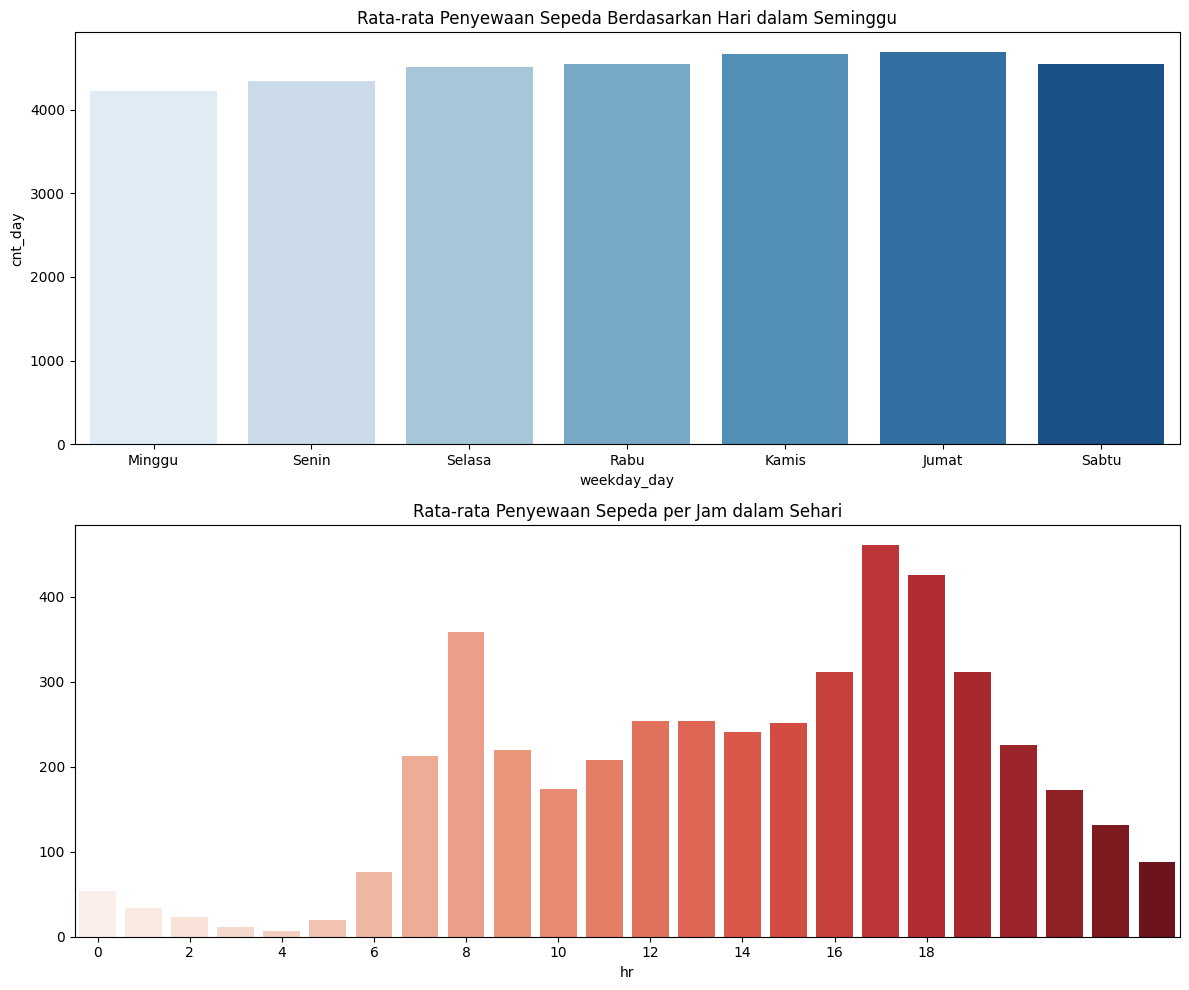

In [509]:
# Hitung rata-rata penyewaan per jam
hourly_trend = merged_df.groupby('hr')['cnt'].mean()

# Cari jam dengan penyewaan terbanyak dan tersedikit
max_hour, max_value = hourly_trend.idxmax(), hourly_trend.max()
min_hour, min_value = hourly_trend.idxmin(), hourly_trend.min()

fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Penyewaan sepeda berdasarkan hari dalam seminggu (gunakan weekday_day jika telah diubah)
sns.barplot(data=day_df, x='weekday_day', y='cnt_day', ax=axes[0], palette='Blues', ci=None)
axes[0].set_title("Rata-rata Penyewaan Sepeda Berdasarkan Hari dalam Seminggu")
axes[0].set_xticklabels(["Minggu", "Senin", "Selasa", "Rabu", "Kamis", "Jumat", "Sabtu"])

# Penyewaan sepeda berdasarkan jam dalam sehari
sns.barplot(x=hourly_trend.index, y=hourly_trend.values, ax=axes[1], palette='Reds', ci=None)
axes[1].set_title("Rata-rata Penyewaan Sepeda per Jam dalam Sehari")
axes[1].set_xticks(range(0, 20, 2))

plt.tight_layout()
plt.show()

# Pertanyaan 3: Bagaimana pengaruh hari dalam seminggu terhadap penyewaan sepeda?

<ipython-input-510-20240ddb3c9f>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_avg_rentals.index, y=day_avg_rentals.values, palette='coolwarm', ax=axes[0])
<ipython-input-510-20240ddb3c9f>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(["Min", "Sen", "Sel", "Rab", "Kam", "Jum", "Sab"])
<ipython-input-510-20240ddb3c9f>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hour_avg_rentals.index, y=hour_avg_rentals.values, palette='viridis', ax=axes[1])
<ipython-input-510-20240ddb3c9f>:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. af

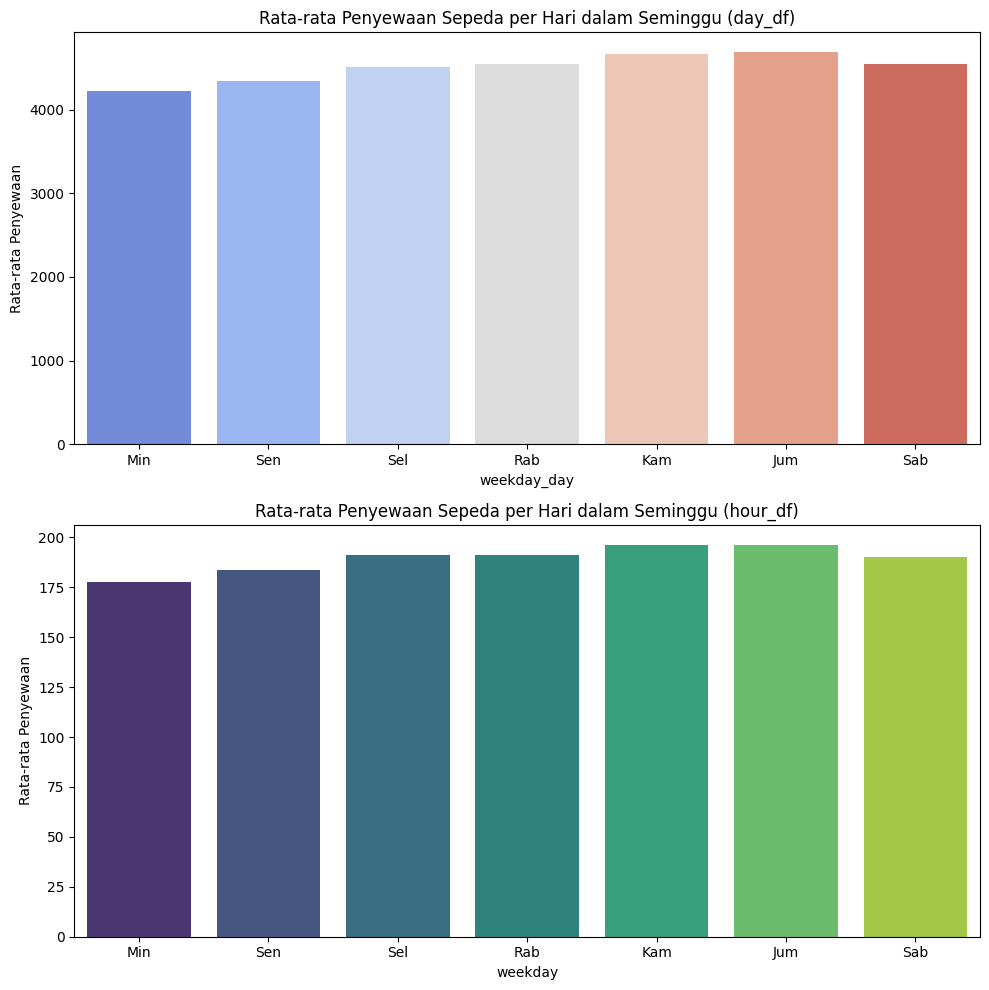

In [510]:
# Hitung rata-rata penyewaan sepeda per hari dalam seminggu
day_avg_rentals = day_df.groupby('weekday_day')['cnt_day'].mean()
hour_avg_rentals = hour_df.groupby('weekday')['cnt'].mean()

fig, axes = plt.subplots(2, 1, figsize=(10, 10))

# Grafik 1: Pengaruh hari dalam seminggu terhadap penyewaan sepeda (day_df)
sns.barplot(x=day_avg_rentals.index, y=day_avg_rentals.values, palette='coolwarm', ax=axes[0])
axes[0].set_title("Rata-rata Penyewaan Sepeda per Hari dalam Seminggu (day_df)")
axes[0].set_xticklabels(["Min", "Sen", "Sel", "Rab", "Kam", "Jum", "Sab"])
axes[0].set_ylabel("Rata-rata Penyewaan")

# Grafik 2: Pengaruh hari dalam seminggu terhadap penyewaan sepeda (hour_df)
sns.barplot(x=hour_avg_rentals.index, y=hour_avg_rentals.values, palette='viridis', ax=axes[1])
axes[1].set_title("Rata-rata Penyewaan Sepeda per Hari dalam Seminggu (hour_df)")
axes[1].set_xticklabels(["Min", "Sen", "Sel", "Rab", "Kam", "Jum", "Sab"])
axes[1].set_ylabel("Rata-rata Penyewaan")

plt.tight_layout()
plt.show()


# Pertanyaan 4: Bagaimana pengaruh musim terhadap jumlah penyewaan sepeda?

<ipython-input-511-ab74e1c1dc97>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=season_avg_rentals_day.index, y=season_avg_rentals_day.values, palette='viridis', ax=axes[0])
<ipython-input-511-ab74e1c1dc97>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=season_avg_rentals_hour.index, y=season_avg_rentals_hour.values, palette='coolwarm', ax=axes[1])


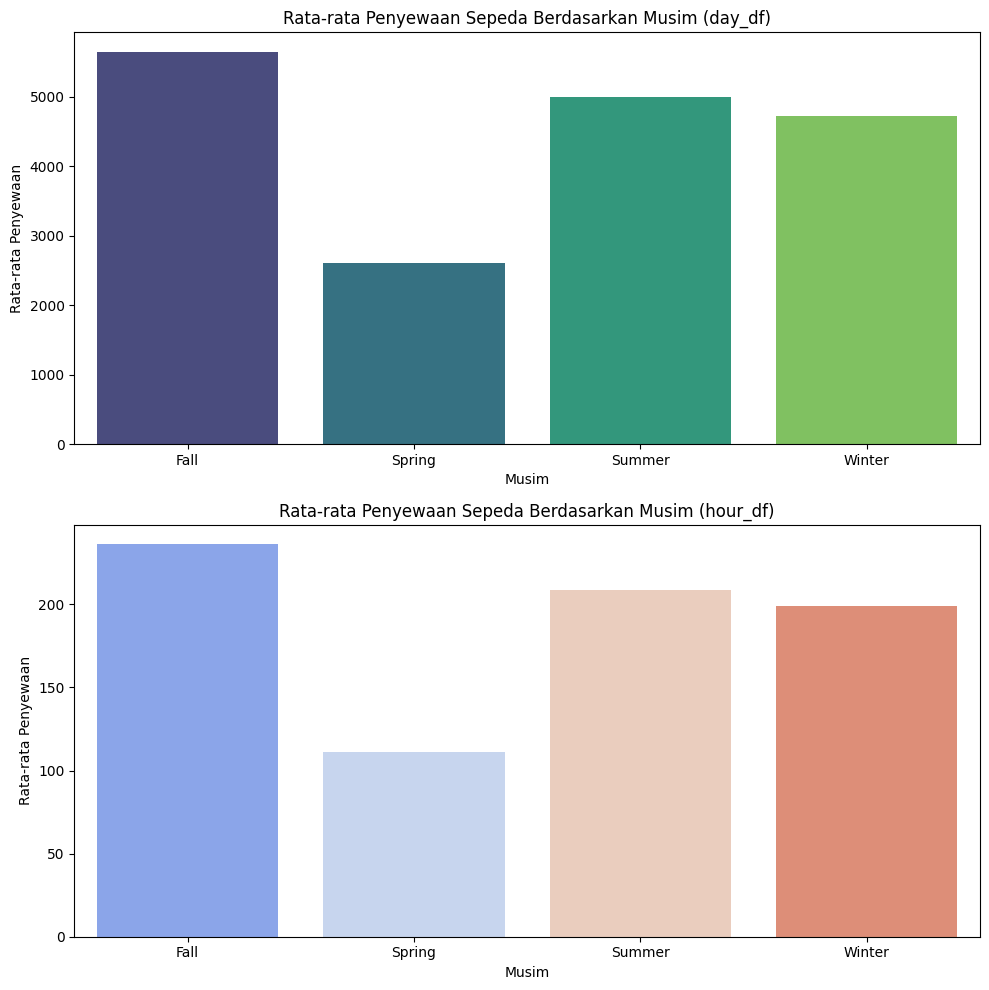

In [511]:
# Hitung rata-rata penyewaan sepeda berdasarkan musim
season_avg_rentals_day = day_df.groupby('season_day')['cnt_day'].mean()
season_avg_rentals_hour = hour_df.groupby('season')['cnt'].mean()

fig, axes = plt.subplots(2, 1, figsize=(10, 10))

# Grafik 1: Pengaruh musim terhadap penyewaan sepeda (day_df)
sns.barplot(x=season_avg_rentals_day.index, y=season_avg_rentals_day.values, palette='viridis', ax=axes[0])
axes[0].set_title("Rata-rata Penyewaan Sepeda Berdasarkan Musim (day_df)")
axes[0].set_xlabel("Musim")
axes[0].set_ylabel("Rata-rata Penyewaan")

# Grafik 2: Pengaruh musim terhadap penyewaan sepeda (hour_df)
sns.barplot(x=season_avg_rentals_hour.index, y=season_avg_rentals_hour.values, palette='coolwarm', ax=axes[1])
axes[1].set_title("Rata-rata Penyewaan Sepeda Berdasarkan Musim (hour_df)")
axes[1].set_xlabel("Musim")
axes[1].set_ylabel("Rata-rata Penyewaan")

plt.tight_layout()
plt.show()

# Pertanyaan 5: Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan?


<ipython-input-512-93839335d1fd>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weather_avg_rentals_day.index, y=weather_avg_rentals_day.values, palette='magma', ax=axes[0])
<ipython-input-512-93839335d1fd>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weather_avg_rentals_hour.index, y=weather_avg_rentals_hour.values, palette='coolwarm', ax=axes[1])


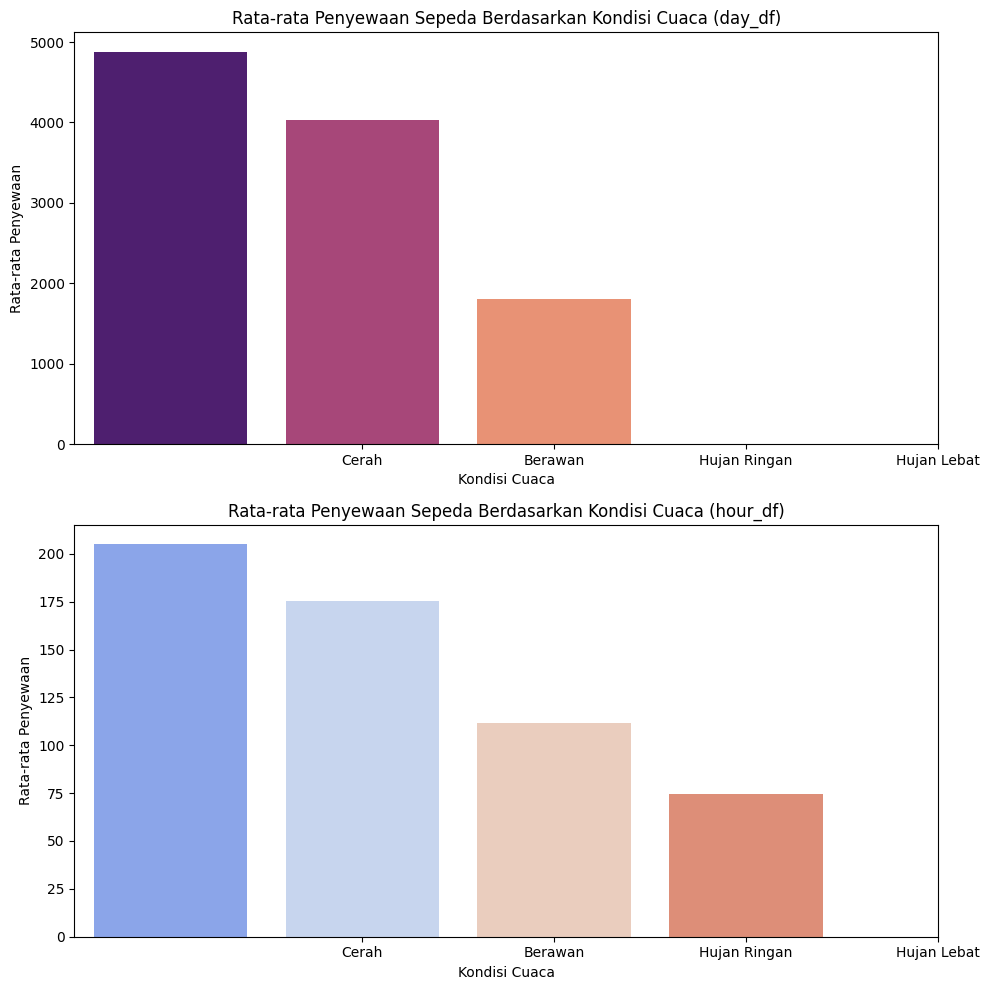

In [512]:
# Hitung rata-rata penyewaan sepeda berdasarkan kondisi cuaca
weather_avg_rentals_day = day_df.groupby('weathersit_day')['cnt_day'].mean()
weather_avg_rentals_hour = hour_df.groupby('weathersit')['cnt'].mean()

fig, axes = plt.subplots(2, 1, figsize=(10, 10))

# Grafik 1: Pengaruh kondisi cuaca terhadap penyewaan sepeda (day_df)
sns.barplot(x=weather_avg_rentals_day.index, y=weather_avg_rentals_day.values, palette='magma', ax=axes[0])
axes[0].set_title("Rata-rata Penyewaan Sepeda Berdasarkan Kondisi Cuaca (day_df)")
axes[0].set_xlabel("Kondisi Cuaca")
axes[0].set_ylabel("Rata-rata Penyewaan")
axes[0].set_xticks(range(1, 5))
axes[0].set_xticklabels(["Cerah", "Berawan", "Hujan Ringan", "Hujan Lebat"])

# Grafik 2: Pengaruh kondisi cuaca terhadap penyewaan sepeda (hour_df)
sns.barplot(x=weather_avg_rentals_hour.index, y=weather_avg_rentals_hour.values, palette='coolwarm', ax=axes[1])
axes[1].set_title("Rata-rata Penyewaan Sepeda Berdasarkan Kondisi Cuaca (hour_df)")
axes[1].set_xlabel("Kondisi Cuaca")
axes[1].set_ylabel("Rata-rata Penyewaan")
axes[1].set_xticks(range(1, 5))
axes[1].set_xticklabels(["Cerah", "Berawan", "Hujan Ringan", "Hujan Lebat"])

plt.tight_layout()
plt.show()


# Pertanyaan 6: Seberapa sering seorang pelanggan menyewa sepeda dalam beberapa bulan terakhir?


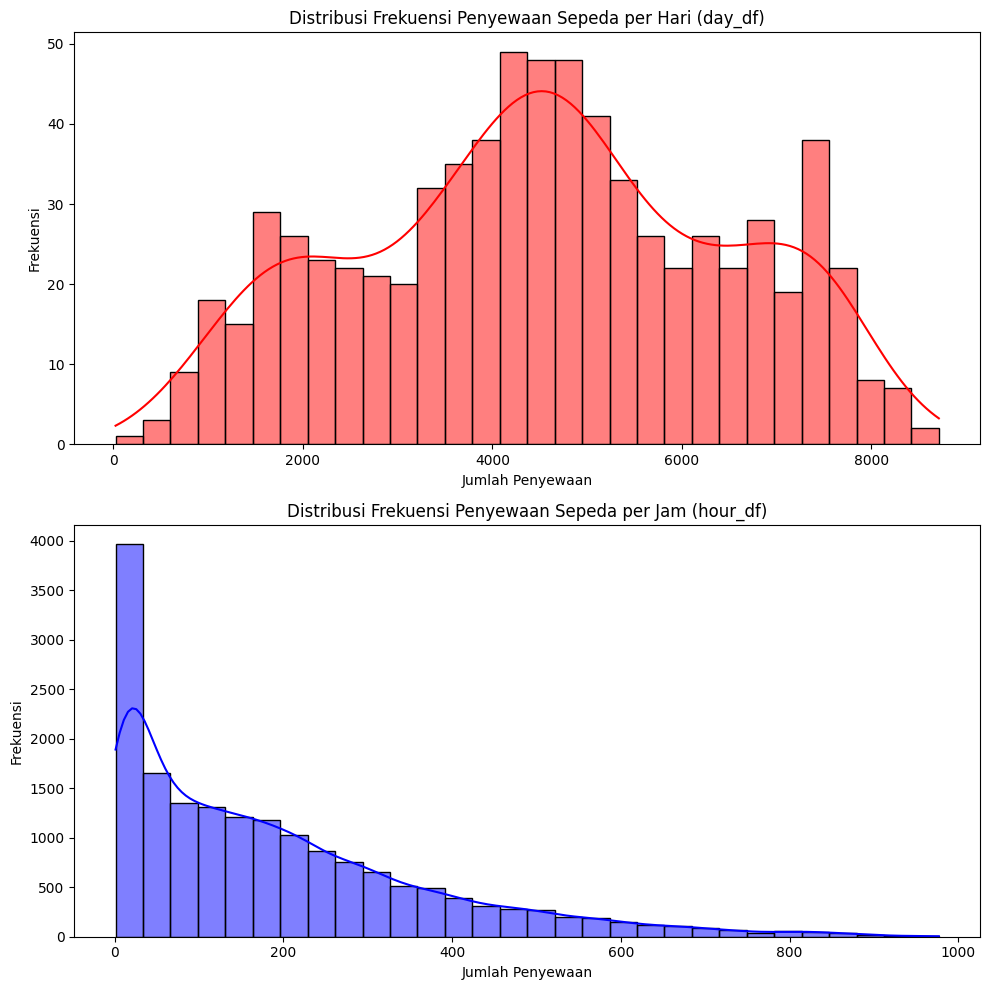

In [513]:
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

# Distribusi frekuensi penyewaan sepeda per hari (day_df)
sns.histplot(data=day_df, x='cnt_day', bins=30, kde=True, color='red', ax=axes[0])
axes[0].set_title("Distribusi Frekuensi Penyewaan Sepeda per Hari (day_df)")
axes[0].set_xlabel("Jumlah Penyewaan")
axes[0].set_ylabel("Frekuensi")

# Distribusi frekuensi penyewaan sepeda per jam (hour_df)
sns.histplot(data=hour_df, x='cnt', bins=30, kde=True, color='blue', ax=axes[1])
axes[1].set_title("Distribusi Frekuensi Penyewaan Sepeda per Jam (hour_df)")
axes[1].set_xlabel("Jumlah Penyewaan")
axes[1].set_ylabel("Frekuensi")

plt.tight_layout()
plt.show()


In [518]:
merged_df.to_csv("data_baru.csv", index=False)
print("Berkas data berhasil disimpan sebagai data_baru.csv!")

Berkas data berhasil disimpan sebagai data_baru.csv!


**Insight:**
- rata-rata penyewa harian menunjukkan pola yang tidak teratur pada periode tertentu
- rata rata penyewaan perjam menunjukkan kenaikan pada jam sibuk, seperti jam 8 pagi dan sore hari
- pada data day.df penyewa cenderung lebih tinggi pada akhir pekan, terutama hari sabtu dan minggu dan pada data hour.df tidak berubah tetap seperti biasa dijam sibuk
-penyewa cenderung lebih tinggi pada fall dan terendah di spring


## Analisis Lanjutan (Opsional)

## Conclusion

- Bagaimana pola penggunaan sepeda berdasarkan waktu (jam, hari, bulan, musim)?
waktu penyewaan paling ramai adalah di pagi dan sore, kemudian Akhir pekan lebih ramai bagi pengguna kasual, sementara hari kerja didominasi oleh pengguna terdaftar dan fall memiliki penyewaan tertinggi, sementara spring memiliki yang terendah.
- Bagaimana cuaca memengaruhi penyewaan sepeda?
Cuaca cerah meningkatkan jumlah penyewaan, sementara hujan dan salju menurunkannya.
- Kapan waktu yang tepat menambah sepeda?
Jam sibuk pagi dan sore, serta musim gugur dan musim panas memerlukan lebih banyak sepeda.